<a href="https://colab.research.google.com/github/VaibhavBhusawale/-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project_(Shaloy%2C_Smriti%2C_Vaibhav).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Hypothesis for the problem:**

1. The number of bikes rented during rainfall/snowfall reduces.
2. The number of bikes rented increases during peak hours.
3. The number of bikes rented during weekends is less compared to weekdays.
4. The number of bikes rented on holidays is less compared to that of working days.
5. The number of bikes rented reduces if there is high humidity.
6. The number of bikes rented on days with high solar radiations is low.
7. The number of bikes rented on average in summer is higher compared to other seasons.

# **Data Warehousing:**

##Importing Libraries

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing data

path = '/content/drive/MyDrive/SeoulBikeData.csv'

df = pd.read_csv(path, encoding='iso-8859-1')

In [ ]:
# Basic inspection

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# updating the attribute names

df = df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temp', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'})

In [ ]:
df.head()

,date,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

Checking the missing values:

In [ ]:
df.isnull().sum()

date                 0
rented_bike_count    0
hour                 0
temp                 0
humidity             0
wind_speed           0
visibility           0
dew_point_temp       0
solar_radiation      0
rainfall             0
snowfall             0
seasons              0
holiday              0
func_day             0
dtype: int64

The are no missing values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               8760 non-null   object 
 1   rented_bike_count  8760 non-null   int64  
 2   hour               8760 non-null   int64  
 3   temp               8760 non-null   float64
 4   humidity           8760 non-null   int64  
 5   wind_speed         8760 non-null   float64
 6   visibility         8760 non-null   int64  
 7   dew_point_temp     8760 non-null   float64
 8   solar_radiation    8760 non-null   float64
 9   rainfall           8760 non-null   float64
 10  snowfall           8760 non-null   float64
 11  seasons            8760 non-null   object 
 12  holiday            8760 non-null   object 
 13  func_day           8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ KB


In [ ]:
df.describe()

,rented_bike_count,hour,temp,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.describe().shape

(8, 10)

# **Visual Inspection:**

In [ ]:
# converting date column from string to datetime features

df['date'] = pd.to_datetime(df.date)

The date column is converted to datetime datatype

In [ ]:
#add month , day, year columns
for df in [df]:
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['day'] = df['date'].dt.day

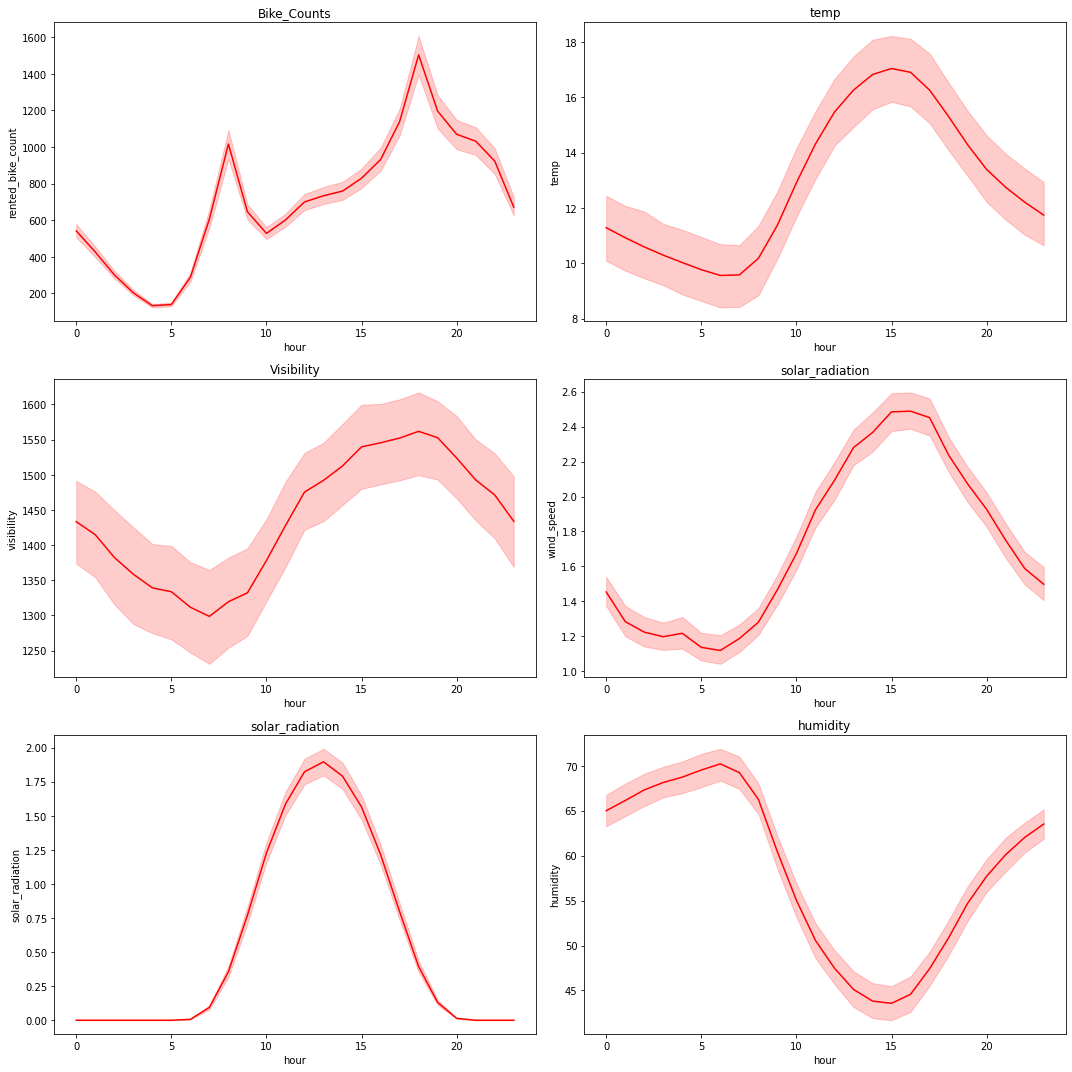

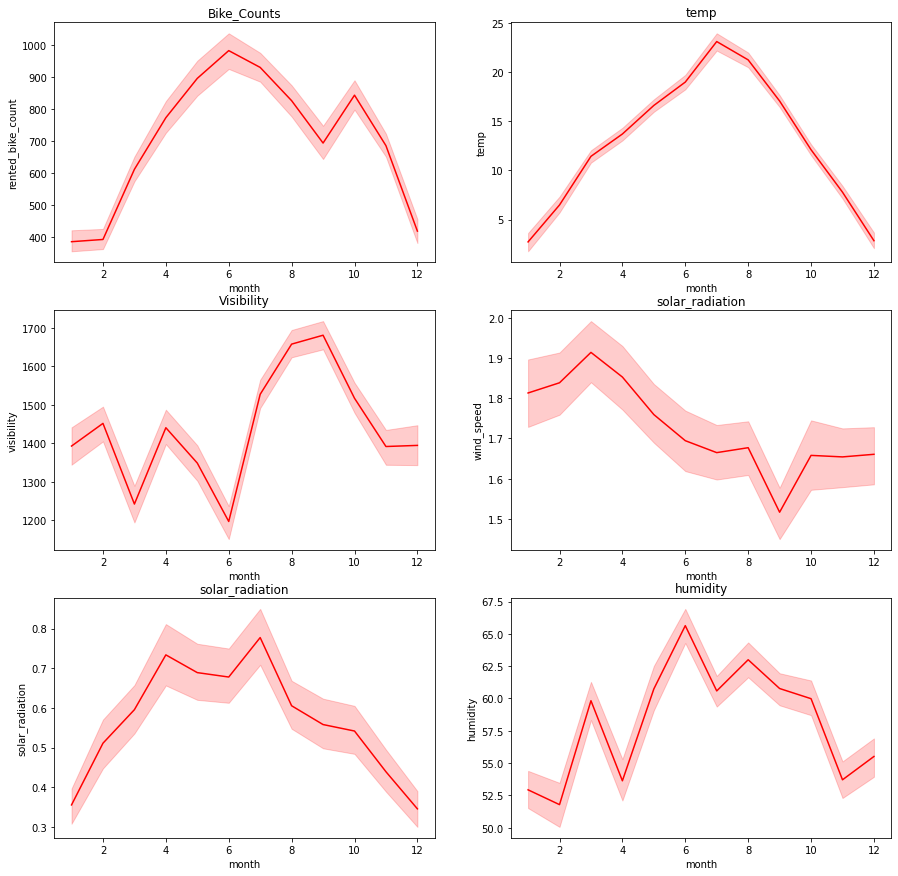

In [ ]:
y= [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='hour', y=y[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])



plt.tight_layout()

m = [['rented_bike_count', 'temp'], ['visibility', 'wind_speed'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['Visibility', 'solar_radiation'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.lineplot(data=df, x='month', y=m[i][j], ax=ax[i][j], color='r')
        ax[i][j].set_title(title[i][j])


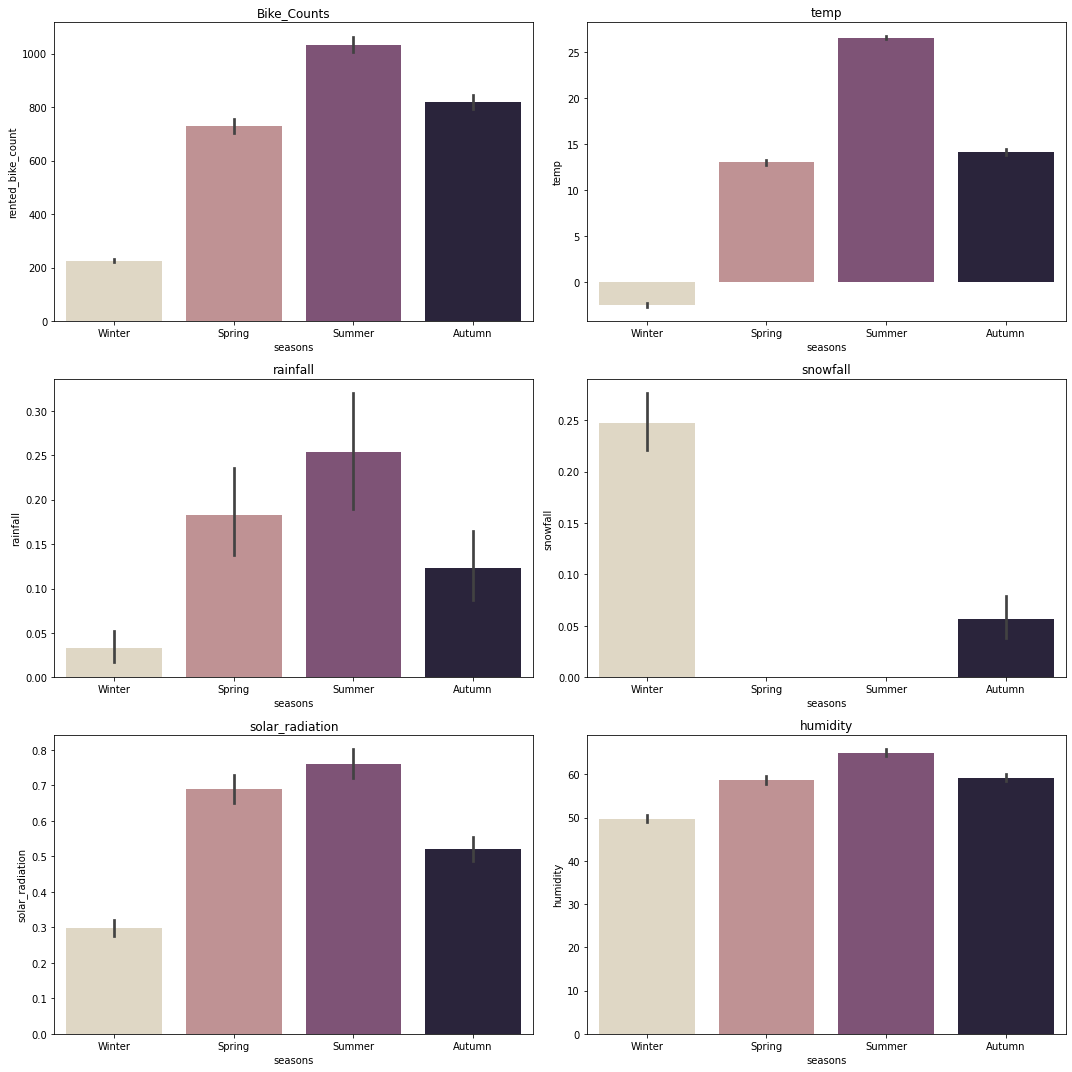

In [ ]:
s= [['rented_bike_count', 'temp'], ['rainfall', 'snowfall'], ['solar_radiation', 'humidity']]
title = [['Bike_Counts', 'temp'], ['rainfall', 'snowfall'], 
         ['solar_radiation', 'humidity']]

f, ax = plt.subplots(3,2,figsize=(15,15))

for i in range(3):
    for j in range(2):
        sns.barplot(data=df, x='seasons', y=s[i][j], ax=ax[i][j], color='r',palette='ch:s=-.2,r=.6')
        ax[i][j].set_title(title[i][j])

plt.tight_layout()  


The number of bikes rented in the months of December, January, and February is very less compared to that of other months.

There are very less number of bikes being rented in winter, and it is the highest in the summer.



In [ ]:
pd.pivot_table(df, index=['holiday', 'func_day'], columns='seasons', values='rented_bike_count',
               aggfunc=lambda x: len(x), margins=True, margins_name='TOTAL')

seasons              Autumn  Spring  Summer  Winter  TOTAL
holiday    func_day                                       
Holiday    No          24.0     NaN     NaN     NaN     24
           Yes         96.0    72.0    48.0   192.0    408
No Holiday No         223.0    48.0     NaN     NaN    271
           Yes       1841.0  2088.0  2160.0  1968.0   8057
TOTAL                2184.0  2208.0  2208.0  2160.0   8760

# **EDA:**

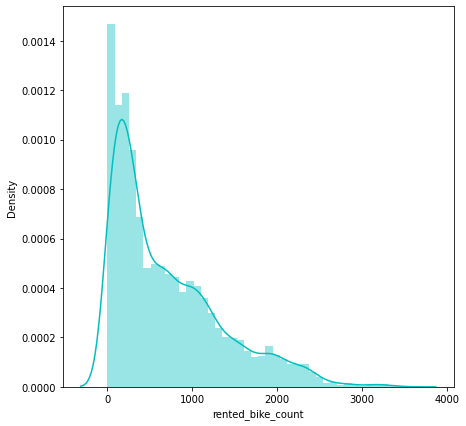

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(df['rented_bike_count'],color="c")

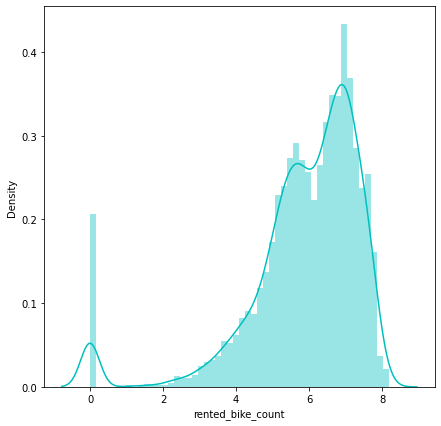

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.log(df['rented_bike_count']+1),color="c")

The log transformation gives us a left skewed distriution.

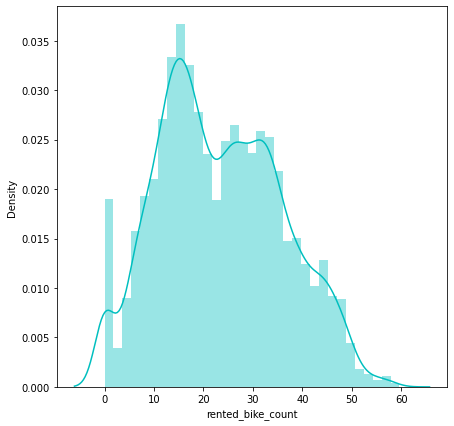

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(df['rented_bike_count']),color="c")

The square root transformation on the dependent variable gives us distributio which is almost normal in nature.

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['rented_bike_count', 'hour', 'temp', 'humidity', 'wind_speed',
       'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall',
       'snowfall', 'month', 'year', 'day'],
      dtype='object')

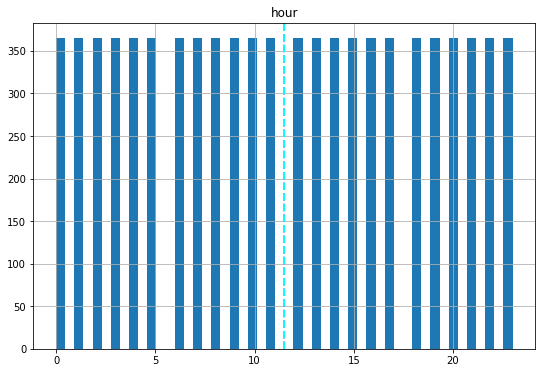

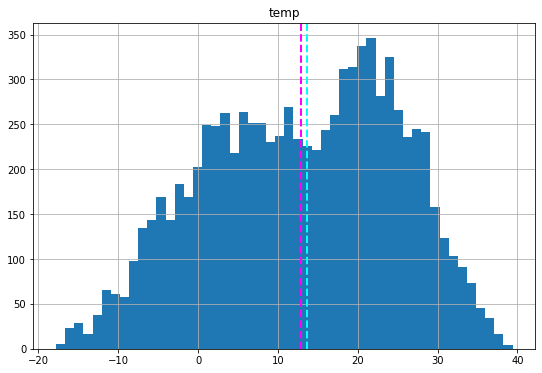

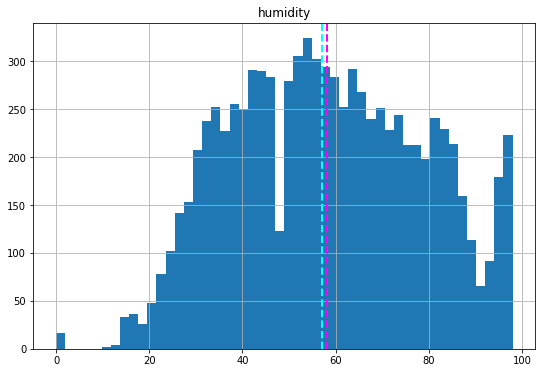

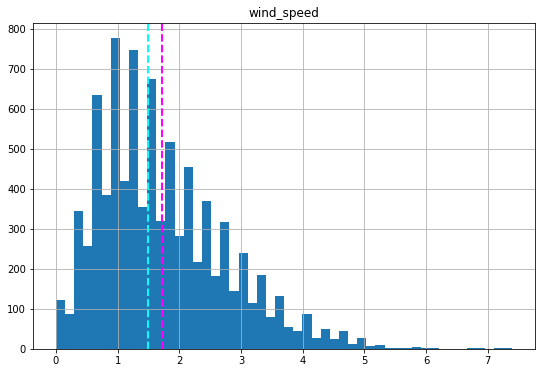

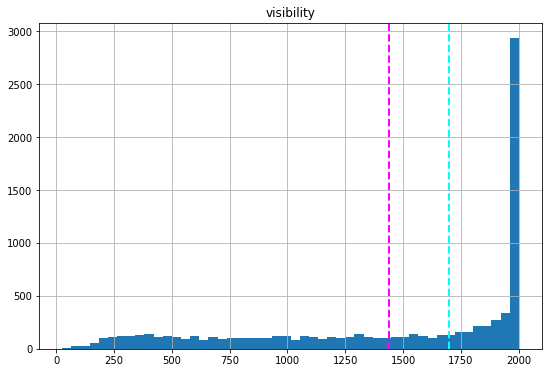

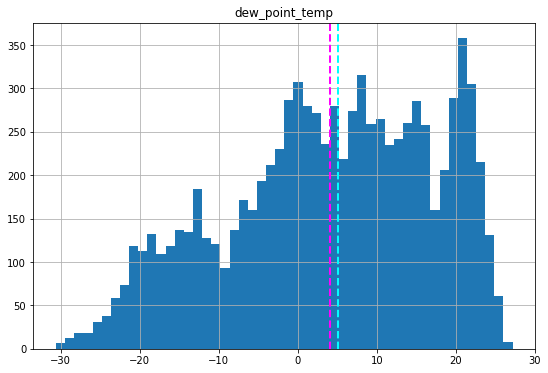

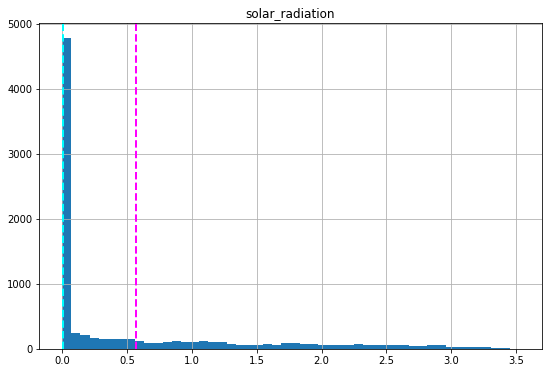

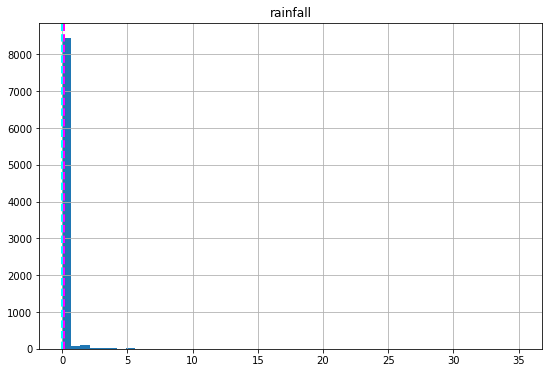

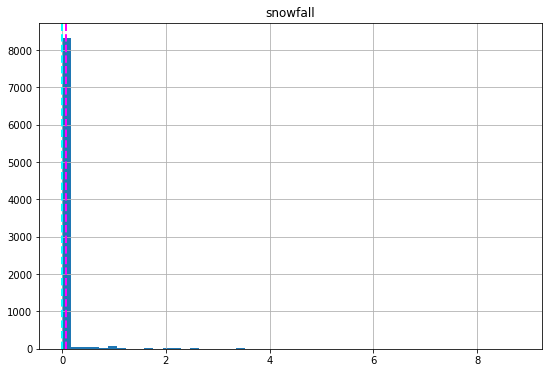

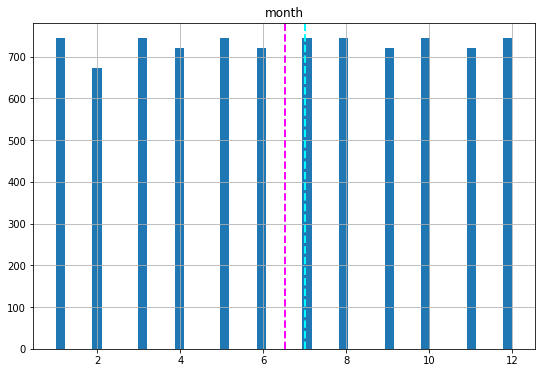

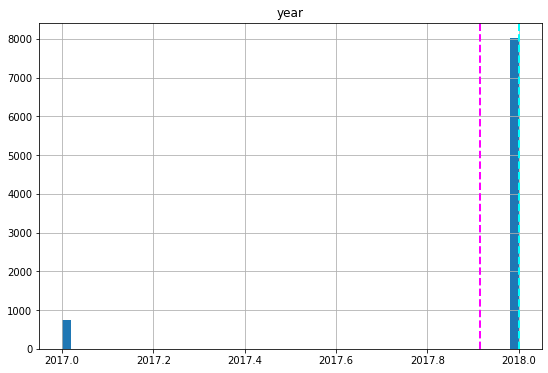

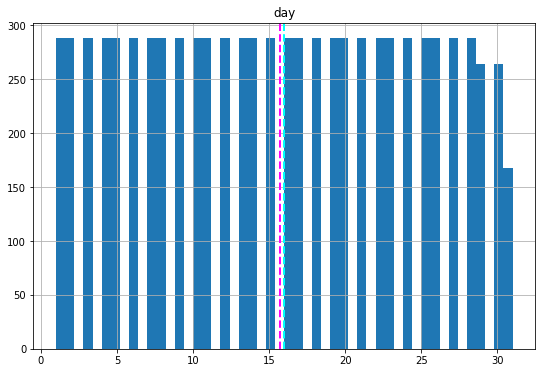

In [ ]:
# plot a bar plot for each numerical feature count (except car_ID)

for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

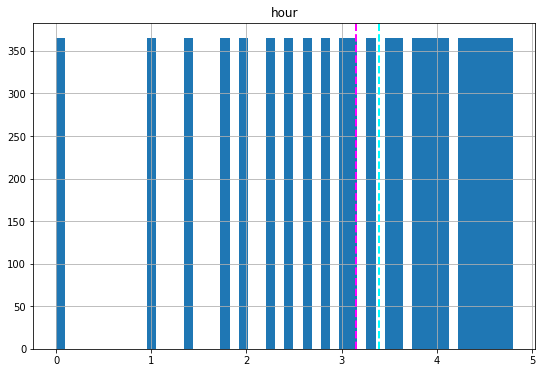

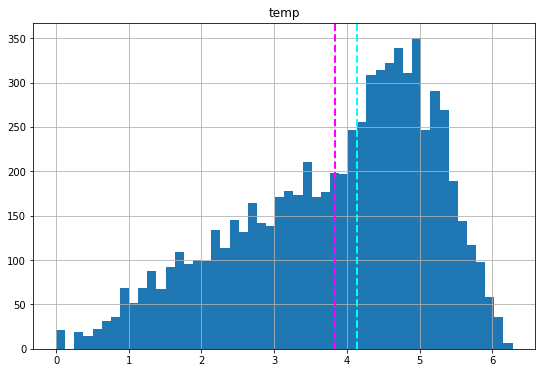

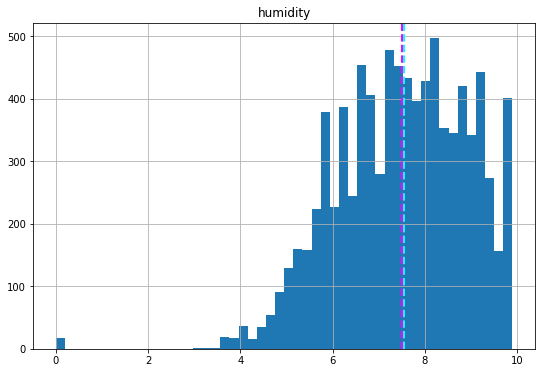

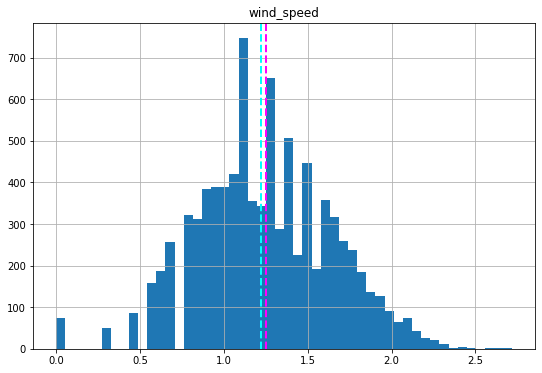

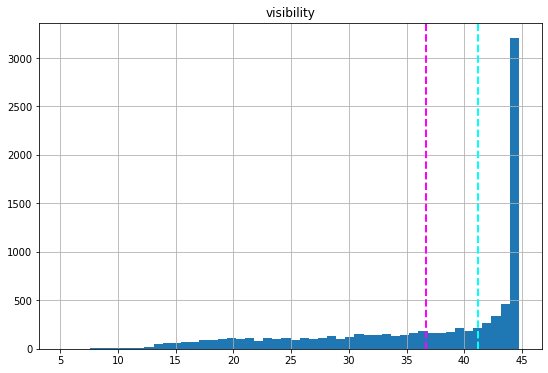

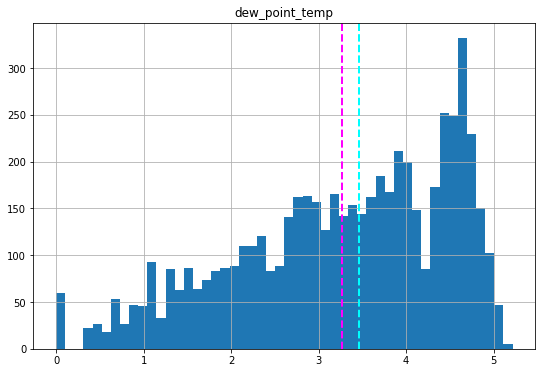

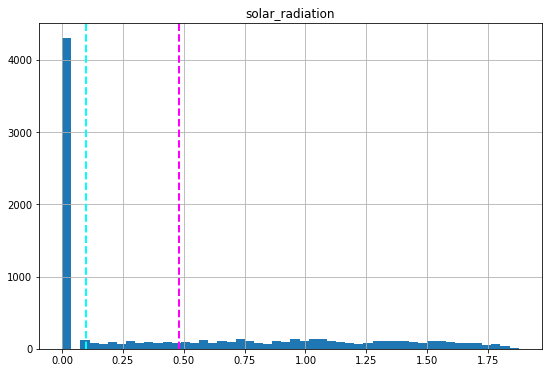

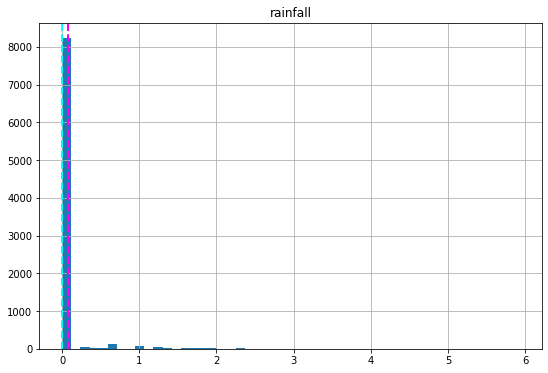

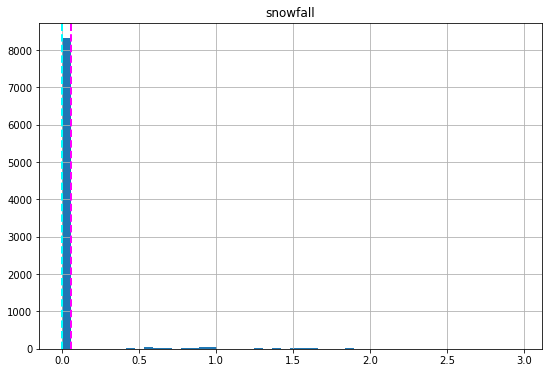

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.sqrt(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['rented_bike_count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('rented_bike_count')
    ax.set_title('rented_bike_count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['rented_bike_count'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

# **Feature engineering and selection:**

In [ ]:
def handle_outliers(df, col, min_, max_):

    # Quantile will return a tuple
    min_threshold, max_threshold = df[col].quantile([min_ ,max_])
    col_mean = df[col].mean()
    new_col = []
    
    for v in df[col]:
        if(v <= max_threshold) and (v >= min_threshold):
            new_col.append(v)
        else:
            new_col.append(col_mean)
            
    df[col] = new_col
    return df

In [ ]:
def min_max_scaling(df, lst_cols):
    transformer = MinMaxScaler().fit(df[lst_cols])
    df[lst_cols] = transformer.transform(df[lst_cols])
    return df

In [ ]:
def standard_scaling(df, lst_cols):
    transformer = StandardScaler().fit(df[lst_cols])
    df[lst_cols] = transformer.transform(df[lst_cols])
    return df

In [ ]:
def one_hot_encoding(df, lst_cols):
    encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(df[lst_cols])
    encoded_cols = list(encoder.get_feature_names(lst_cols))
    df[encoded_cols] = encoder.transform(df[lst_cols])
    return df

In [ ]:
df.head()

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

The dew_point_temp, season_Summer, and season_Winter attributes show high correlation. Hence it can be dropped.

In [ ]:
df = df.drop(['dew_point_temp'], axis=1)

In [ ]:
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
df.head()

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['date','rented_bike_count','hour','month','year','day']]])

In [ ]:
df = df.drop(['humidity',], axis=1)

In [ ]:
numeric_features = ['temp','humidity','wind_speed','visibility','solar_radiation','rainfall','snowfall']

In [ ]:
df.columns

In [ ]:
categorical_features = ['date','month','hour','seasons','holiday','func_day','year','day']

In [ ]:
for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'rented_bike_count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("rented_bike_count")
plt.show()

In [ ]:
df.head()

In [ ]:
# Data encoding
#label encoding
encoders_nums = {"func_day":{"Yes":1,"No":0},
                 "holiday":{"Holiday":1,"No Holiday":0},
                 }

df = df.replace(encoders_nums)

In [ ]:
df.head()

In [ ]:
df = pd.get_dummies(df, prefix=None, prefix_sep='_', dummy_na=False, columns=['seasons'], sparse=False, drop_first=False, dtype=None)
df.head()

In [ ]:
df.info()

In [ ]:
numeric_features

In [ ]:
features = numeric_features.copy()
features.extend(['seasons_Winter','seasons_Summer','seasons_Spring','seasons_Autumn', 'month','hour','day'])
features

# **Linear regression:**

In [ ]:
from scipy.stats import zscore
#Train test split
X = df[features].apply(zscore)

In [ ]:
y = np.sqrt(df['rented_bike_count'])

In [ ]:
# Feature and target
X = df.drop(columns=['rented_bike_count','date'])
y = df.rented_bike_count


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from xgboost import XGBRegressor

%config InlineBackend.figure_format = 'retina'

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determine the mutual information
mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
reg.score(X_train, y_train)

In [ ]:
##############################################################################

Since the score is very less, we need to go back to the EDA section and handle the outliers and/or errors in the data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
regressor.intercept_
regressor.coef_

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_train

In [ ]:
# Actual profits on test data
y_test

In [ ]:
mean_squared_error(y_test, y_pred)

In [ ]:
from numpy import math

In [ ]:
# Train performance
math.sqrt(mean_squared_error(y_train, y_pred_train))

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
r2_score(y_train, y_pred_train)

In [ ]:
r2_score(y_test, y_pred)

##Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

In [ ]:
lasso.score(X_train, y_train)

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

In [ ]:
r2_score(y_test,y_pred)

##feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# y_train = sc_y.fit_transform(y_train)
# y_train = sc_y.fit_transform(y_pred)

##XG Boost

In [ ]:
import xgboost as xgb

In [ ]:
# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

# Train the model with train data sets
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values

MSE = mse(y_true, y_pred)
RMSE = np.sqrt(MSE)

R_squared = r2_score(y_true, y_pred)

print("\nRMSE: ", np.round(RMSE, 4))
print()
print("R-Squared: ", np.round(R_squared, 5))



##Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train,y_train)

In [ ]:
y_pred=regressor.predict(X_test)
y_pred

In [ ]:
from sklearn import metrics
r2_score(y_test,y_pred)
